In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:

file_path = "Resources\\MoviesOnStreamingPlatforms_updated.csv"

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.drop(columns=["Rotten Tomatoes","Directors","Type","Unnamed: 0"], inplace=True)

df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
complete_df = df.loc[~((df['IMDb'].isnull() )|(df['Genres'].isnull())|(df['Language'].isnull())|(df["Country"].isnull())|(df['Age'].isnull()))]

complete_df.shape

(7192, 13)

In [5]:
complete_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


In [6]:
complete_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [7]:
complete_df = pd.melt(complete_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Genres', 'Country', 'Language', 'Runtime'], 
                      value_vars= ['Netflix', 'Hulu', 'Prime Video','Disney+'], var_name = "Service")

#complete_df.head()


In [8]:
complete_df = complete_df[complete_df["value"]==1]

complete_df.drop(columns=["value"], inplace=True)

complete_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Service
0,1,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix
1,2,The Matrix,1999,18+,8.7,"Action,Sci-Fi",United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,13+,8.5,"Action,Adventure,Sci-Fi",United States,English,149.0,Netflix
3,4,Back to the Future,1985,7+,8.5,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix
...,...,...,...,...,...,...,...,...,...,...
28763,16727,Richie Rich's Christmas Wish,1998,all,4.1,"Comedy,Family",United States,English,84.0,Disney+
28764,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,"Adventure,Family",United States,English,77.0,Disney+
28765,16738,The Bears and I,1974,all,6.2,"Drama,Family",United States,English,89.0,Disney+
28766,16739,Whispers: An Elephant's Tale,2000,all,5.0,"Adventure,Family",United States,English,72.0,Disney+


In [9]:
netflix_movies = len(complete_df[complete_df["Service"]=="Netflix"])
hulu_movies = len(complete_df[complete_df["Service"]=="Hulu"])
prime_movies = len(complete_df[complete_df["Service"]=="Prime Video"])
disney_movies = len(complete_df[complete_df["Service"]=="Disney+"])


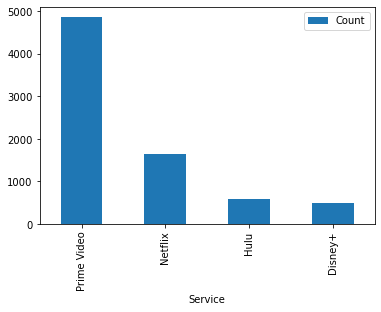

In [10]:
count = [netflix_movies, hulu_movies, prime_movies, disney_movies]
labels = ["Netflix", "Hulu", "Prime Video", "Disney+"]
colors = ["r", "g", "b", "k"]

service_movie_count = pd.DataFrame({"Service" : labels, "Count":count }).sort_values(by = "Count", ascending=False)
service_movie_count_plot = service_movie_count.plot.bar(x="Service", y="Count",)

plt.show()

#### We can see that Prime Video has the largest selection of movies out of all the platforms. However, quantity is not always equal to quality...

### Next, we'll see which streaming service has the best distribution of IMDb ratings in their movies.

##### We'll do this with a Boxplot

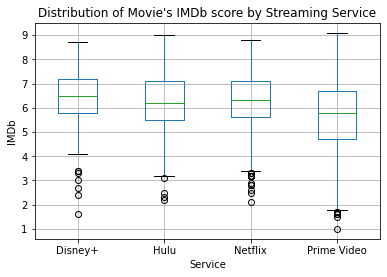

In [19]:
complete_df.boxplot(column = "IMDb", by = "Service")

plt.title("Distribution of Movie's IMDb score by Streaming Service")
plt.ylabel("IMDb")
plt.suptitle("")
#plt.grid(False)

plt.show()

#### We can see that Disney+ and Netflix have a better IMDb score distribution than the rest of the streaming services.
#### Even if Disney+ has the lowest selection of movies, they have top-rated movies in their collection.